In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('Weather.csv', skipinitialspace=True)
df.head()

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,1997-1-1,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,...,10.0,9.0,4.0,13,6,NaN,0.0,6.0,NaN,229
1,1997-1-2,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,...,10.0,9.0,4.0,26,8,47.0,0.0,5.0,Rain,143
2,1997-1-3,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,...,10.0,10.0,7.0,27,19,NaN,0.0,6.0,Rain-Snow,256
3,1997-1-4,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,49.0,...,10.0,10.0,10.0,27,19,40.0,0.0,2.0,NaN,284
4,1997-1-5,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,86.0,...,10.0,5.0,1.0,14,6,NaN,0.0,7.0,Snow,2


In [3]:
df.shape

(6812, 23)

In [4]:
M = 10
N = 500 * M if M <= 6 else 300 * M
indexes = [M + i for i in range(5)] + []

pd.concat([df.iloc[M:M + 5, :], df.iloc[::N, :]], ignore_index=False)

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
10,1997-1-11,16.0,10.0,5.0,10.0,7.0,5.0,100.0,90.0,67.0,...,10.0,6.0,0.0,11,2,NaN,0.0,3.0,Fog,344
11,1997-1-12,17.0,10.0,3.0,8.0,6.0,3.0,100.0,84.0,55.0,...,10.0,10.0,10.0,14,8,NaN,0.0,1.0,NaN,345
12,1997-1-13,15.0,9.0,4.0,9.0,4.0,-1.0,100.0,75.0,38.0,...,10.0,9.0,3.0,11,2,NaN,0.0,4.0,Fog,128
13,1997-1-14,11.0,6.0,0.0,4.0,2.0,0.0,100.0,81.0,50.0,...,10.0,9.0,1.0,14,2,NaN,0.0,4.0,NaN,35
14,1997-1-15,11.0,8.0,5.0,7.0,5.0,4.0,100.0,83.0,62.0,...,10.0,10.0,8.0,10,3,NaN,0.0,6.0,Rain,16
0,1997-1-1,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,...,10.0,9.0,4.0,13,6,NaN,0.0,6.0,NaN,229
3000,2005-7-25,32.0,26.0,21.0,13.0,9.0,3.0,50.0,35.0,16.0,...,10.0,10.0,10.0,24,13,58.0,0.0,1.0,NaN,215
6000,2013-10-11,24.0,17.0,9.0,7.0,6.0,3.0,82.0,52.0,19.0,...,31.0,19.0,10.0,21,6,45.0,0.0,1.0,NaN,330


In [5]:
df.dtypes

CET                            object
Max TemperatureC              float64
Mean TemperatureC             float64
Min TemperatureC              float64
Dew PointC                    float64
MeanDew PointC                float64
Min DewpointC                 float64
Max Humidity                  float64
Mean Humidity                 float64
Min Humidity                  float64
Max Sea Level PressurehPa       int64
Mean Sea Level PressurehPa      int64
Min Sea Level PressurehPa       int64
Max VisibilityKm              float64
Mean VisibilityKm             float64
Min VisibilitykM              float64
Max Wind SpeedKm/h              int64
Mean Wind SpeedKm/h             int64
Max Gust SpeedKm/h            float64
Precipitationmm               float64
CloudCover                    float64
Events                         object
WindDirDegrees                  int64
dtype: object

In [6]:
df[['year', 'month', 'day']] = df['CET'].str.split('-', n=3, expand=True)
df['month'] = df['month'].map(lambda x: '0' + x if len(x) == 1 else x)
df['day'] = df['day'].map(lambda x: '0' + x if len(x) == 1 else x)
df = df.drop('CET', axis=1)
cols = ['day', 'month', 'year'] + list(df)[:-3]
df = df[cols]
df

,day,month,year,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,01,01,1997,7.0,4.0,2.0,5.0,3.0,2.0,100.0,...,10.0,9.0,4.0,13,6,NaN,0.00,6.0,NaN,229
1,02,01,1997,7.0,3.0,0.0,6.0,3.0,0.0,100.0,...,10.0,9.0,4.0,26,8,47.0,0.00,5.0,Rain,143
2,03,01,1997,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,...,10.0,10.0,7.0,27,19,NaN,0.00,6.0,Rain-Snow,256
3,04,01,1997,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,...,10.0,10.0,10.0,27,19,40.0,0.00,2.0,NaN,284
4,05,01,1997,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,...,10.0,5.0,1.0,14,6,NaN,0.00,7.0,Snow,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,27,12,2015,14.0,7.0,-1.0,6.0,2.0,-2.0,100.0,...,31.0,14.0,5.0,14,6,NaN,0.00,8.0,Fog,38
6808,28,12,2015,15.0,8.0,2.0,8.0,4.0,1.0,100.0,...,31.0,14.0,8.0,27,8,45.0,0.51,7.0,Rain,243
6809,29,12,2015,11.0,8.0,5.0,9.0,7.0,5.0,100.0,...,31.0,9.0,0.0,14,8,32.0,2.03,5.0,Fog-Rain,190
6810,30,12,2015,9.0,8.0,6.0,7.0,6.0,5.0,93.0,...,19.0,10.0,6.0,14,5,34.0,0.00,6.0,NaN,256


In [7]:
len(df[df['Events'].isna()])

5014

In [8]:
df[['day', 'month', 'year', 'Mean Humidity', 'Mean Wind SpeedKm/h']][df['Mean Humidity'] == df['Mean Humidity'].min()]

,day,month,year,Mean Humidity,Mean Wind SpeedKm/h
3012,06,08,2005,15.0,10


In [9]:
df[['month', 'Mean TemperatureC']][(df['Mean TemperatureC'] >= 0) & (df['Mean TemperatureC'] <= 5)]

,month,Mean TemperatureC
0,01,4.0
1,01,3.0
2,01,3.0
3,01,3.0
4,01,0.0
...,...,...
6486,02,4.0
6487,02,4.0
6497,02,5.0
6520,03,4.0


In [10]:
df[['year', 'month', 'Mean TemperatureC']].groupby(['year', 'month']).mean()

Mean TemperatureC
year month                   
1997 01              6.967742
     02              9.607143
     03             12.967742
     04             15.500000
     05             16.709677
...                       ...
2015 08             25.290323
     09             20.033333
     10             15.612903
     11             11.600000
     12              8.290323

[226 rows x 1 columns]

In [11]:
df[['month', 'Mean TemperatureC']].groupby(['month']).mean()

,Mean TemperatureC
month,
01,5.688730
02,6.947070
03,10.148746
04,12.859259
05,16.667235
06,22.116071
07,25.074703
08,24.785965
09,20.494737


In [12]:
df[['day', 'Max TemperatureC']].groupby(['day']).mean()

,Max TemperatureC
day,
01,20.791111
02,20.878924
03,20.748879
04,20.924107
05,21.022321
06,21.294643
07,20.745536
08,20.879464
09,20.906250


In [13]:
df[['year', 'Events']][df['Events'] == 'Fog'].groupby(['year']).count()

,Events
year,
1997,19
1998,14
1999,14
2000,9
2001,12
2002,23
2003,11
2004,10
2005,8


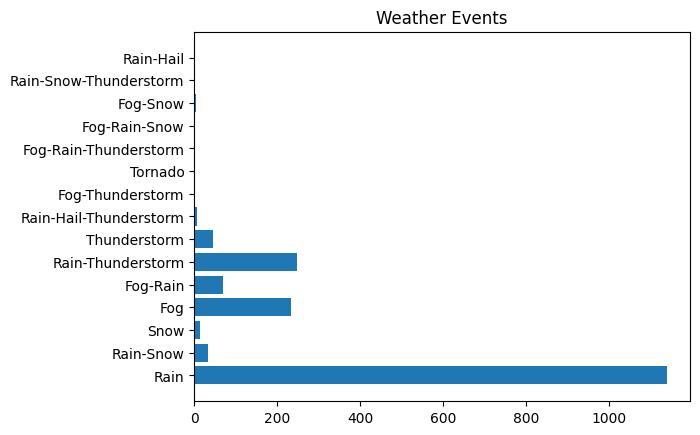

In [14]:
events = df['Events'].dropna().unique()
counts = [len(df[df['Events'] == event]) for event in events]

plt.title('Weather Events')
plt.barh(events.astype(str), counts)
plt.show()

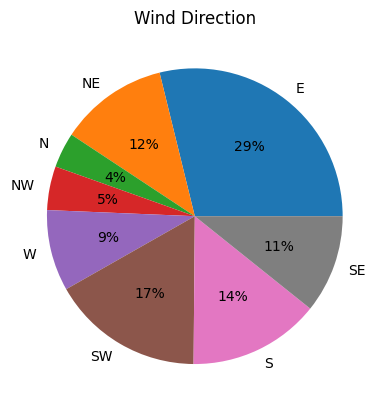

In [15]:
directions = ['E', 'NE', 'N', 'NW', 'W', 'SW', 'S', 'SE']


def direction(degree: int) -> str:
    degree += 45 / 2
    degree %= 360
    return directions[int(degree / 45)]


directions_data = df['WindDirDegrees'].map(direction)
counts = [len(directions_data.loc[directions_data == direct]) for direct in directions]

plt.title('Wind Direction')
plt.pie(counts, labels=directions, autopct='%1.0f%%')
plt.show()

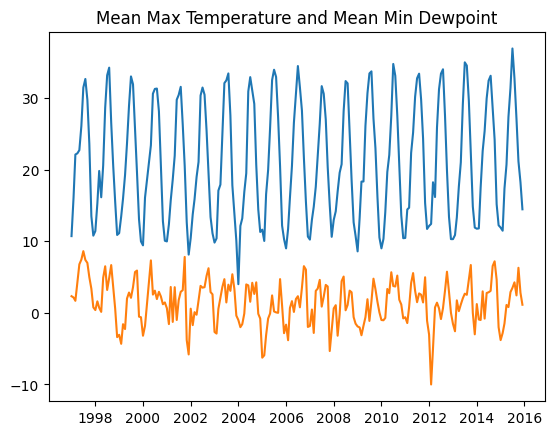

In [16]:
from datetime import datetime

data = df[['year', 'month', 'Max TemperatureC', 'Min DewpointC']].groupby(['year', 'month']).mean()

dates = []
for date, _ in data.iterrows():
    year, month = date
    dates.append(datetime(year=int(year), month=int(month), day=1))

plt.title('Mean Max Temperature and Mean Min Dewpoint')
plt.plot(dates, data['Max TemperatureC'])
plt.plot(dates, data['Min DewpointC'])
plt.show()